# Team Project - Static Measures and Initial Uncertainty
## Team 4: Qiqi Wang, Jiachen Wang, Yanli pei, Honggeun Jo

## Objectives
### 1. Test the significance of the difference in the porosity and permeability by facies (declustered)
### 2. Provide an initial assessment of heterogeneity
        Use coefficient of variation, Dykstra- Parsons and Lorenz (by facies)
### 3. Provide an initial uncertainty model (declustered, by-facies) for porosity and permeability 
###     For facies proportions and oil in place
        assume thickness = 20m and oil saturation = 90% 
### 4. Impact of another 10 wells on the uncertainty model

In [203]:
## Import needed package
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting
from scipy import stats                   # summary statistics
import math                               # trig etc.
import scipy.signal as signal             # kernel for moving window calculation
import random
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python        

## Set Working Directory
os.chdir("/Users/jiachengwang/Documents/Pyrcz/Gro_Pro")  # set the working directory

# Load Data 
df = pd.read_csv("4_sample_data.csv")                       # well sample data
AI_map = np.loadtxt("4_AI.csv", delimiter = ",")            # AI map
df_subset = pd.DataFrame(df.iloc[:,1:7])

In [204]:
# Split data frame into two part based on their facies
Well_pool = list(range(0,177))               # a sequence or set will work here.                           # set the number to select here.
Ten_wells = pd.DataFrame(df_subset.iloc[random.sample(Well_pool, 10)]) 
df_added = pd.concat([df_subset,Ten_wells])
df_sand=df_added.loc[(df_subset['Facies']==1)]
df_shale=df_added.loc[(df_subset['Facies']==0)]

In [205]:
df_sand.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,165.0,452.484848,227.495393,10.000000,290.000000,470.000000,610.000000,980.000000
Y,165.0,679.587879,237.671632,9.000000,519.000000,739.000000,869.000000,999.000000
Facies,165.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Porosity,165.0,0.125885,0.034847,0.079210,0.092034,0.122364,0.157003,0.186311
Perm,165.0,175.174566,606.313543,0.027218,7.608952,30.149009,106.731887,5689.823420
AI,165.0,2968.829177,692.562404,1759.403262,2385.434144,2862.417664,3500.807463,4516.534318


In [206]:
df_shale.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,23.0,633.043478,302.481176,0.000000,490.000000,770.000000,875.000000,950.000000
Y,23.0,320.652174,341.966586,20.000000,44.000000,230.000000,544.000000,979.000000
Facies,23.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Porosity,23.0,0.088800,0.006097,0.078601,0.083553,0.090800,0.092756,0.097991
Perm,23.0,18.782036,38.042346,0.212234,1.087798,2.473886,13.885223,130.115998
AI,23.0,4338.037587,390.032739,3771.938792,4129.652418,4210.096196,4662.252106,5124.532354


In [207]:
xmin = 0.0; xmax = 1000.0               # range of x values
ymin = 0.0; ymax = 1000.0               # range of y values
pormin = 0; pormax = 0.2;             # range of porosity values
nx = 100; ny = 100; csize = 10.0
cmap = plt.cm.plasma                    # color map

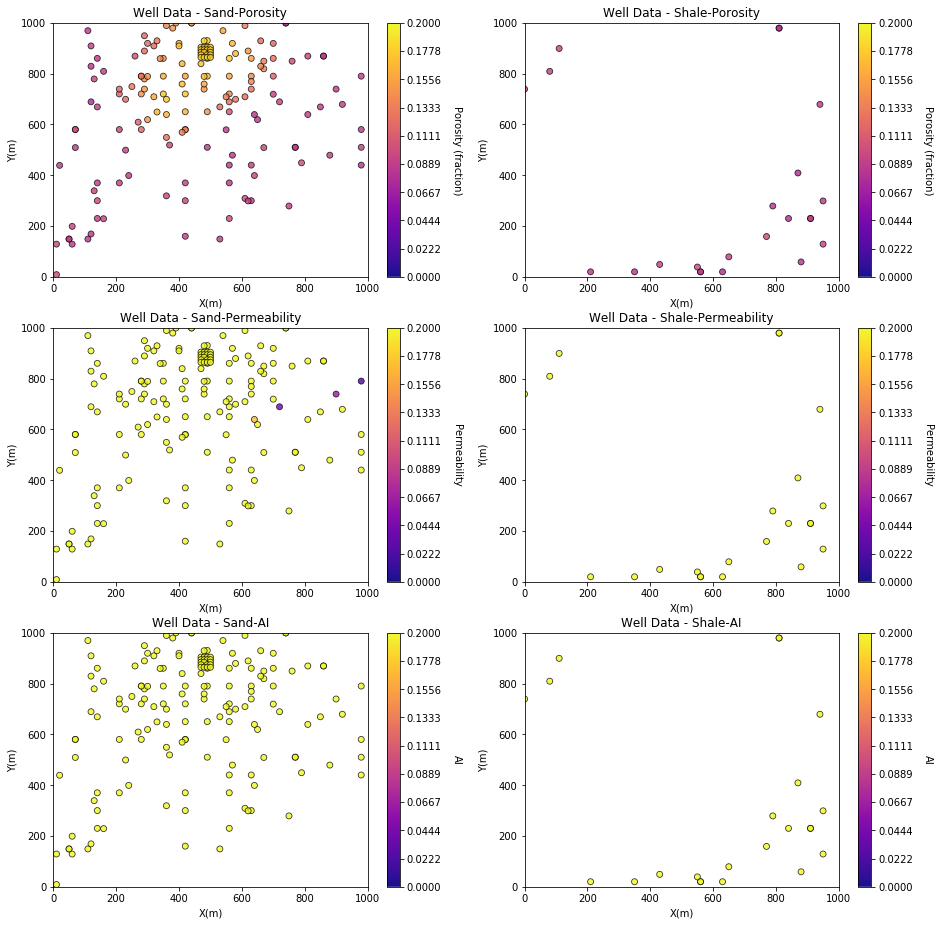

In [208]:
plt.subplot(321)
GSLIB.locmap_st(df_sand,'X','Y','Porosity',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - Sand-Porosity','X(m)','Y(m)','Porosity (fraction)',cmap)

plt.subplot(322)
GSLIB.locmap_st(df_shale,'X','Y','Porosity',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - Shale-Porosity','X(m)','Y(m)','Porosity (fraction)',cmap)

plt.subplot(323)
GSLIB.locmap_st(df_sand,'X','Y','Perm',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - Sand-Permeability','X(m)','Y(m)','Permeability',cmap)

plt.subplot(324)
GSLIB.locmap_st(df_shale,'X','Y','Perm',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - Shale-Permeability','X(m)','Y(m)','Permeability',cmap)

plt.subplot(325)
GSLIB.locmap_st(df_sand,'X','Y','AI',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - Sand-AI','X(m)','Y(m)','AI',cmap)

plt.subplot(326)
GSLIB.locmap_st(df_shale,'X','Y','AI',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - Shale-AI','X(m)','Y(m)','AI',cmap)


plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=3.0, wspace=0.2, hspace=0.2)
plt.show()

In [209]:
wts_po, cell_sizes_po, dmeans_po = geostats.declus(df_sand,'X','Y','Porosity',iminmax = 1, noff= 10, ncell=100,cmin=10,cmax=2000)
df_sand['Wts_po'] = wts_po                            # add weights to the sample data DataFrame

wts_pe, cell_sizes_pe, dmeans_pe = geostats.declus(df_sand,'X','Y','Perm',iminmax = 1, noff= 10, ncell=100,cmin=10,cmax=2000)
df_sand['Wts_pe'] = wts_pe                            # add weights to the sample data DataFrame

wts_ai, cell_sizes_ai, dmeans_ai = geostats.declus(df_sand,'X','Y','AI',iminmax = 1, noff= 10, ncell=100,cmin=10,cmax=2000)
df_sand['Wts_ai'] = wts_ai                            # add weights to the sample data DataFrame         

def weighted_avg_and_std(values, weights): # function to calculate weighted mean and st. dev., from Eric O Lebigot, stack overflow,
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)
    return (average, math.sqrt(variance))




sample_avg_po, sample_stdev_po = weighted_avg_and_std(df_sand['Porosity'],df_sand['Wts_po'])
sample_avg_pe, sample_stdev_pe = weighted_avg_and_std(df_sand['Perm'],df_sand['Wts_pe'])
sample_avg_ai, sample_stdev_ai = weighted_avg_and_std(df_sand['AI'],df_sand['Wts_ai'])

print('Declustered mean_po = ' + str(round(sample_avg_po,3)) + ' and declustered standard deviation_po = ' + str(round(sample_stdev_po,3)))
print('Declustered mean_pe = ' + str(round(sample_avg_pe,3)) + ' and declustered standard deviation_pe = ' + str(round(sample_stdev_pe,3)))
print('Declustered mean_ai = ' + str(round(sample_avg_ai,3)) + ' and declustered standard deviation_ai = ' + str(round(sample_stdev_ai,3)))


df_sand.head()

There are 165 data with:
   mean of      0.12588523262947576 
   min and max  0.07921048095026448 and 0.1863112059530446
   standard dev 0.03474111794255385 


/Users/jiachengwang/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


There are 165 data with:
   mean of      175.17456636372617 
   min and max  0.027218354189205173 and 5689.823420175194
   standard dev 604.4734373303386 


/Users/jiachengwang/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


There are 165 data with:
   mean of      2968.829177479856 
   min and max  1759.403262272691 and 4516.534318085345
   standard dev 690.4605408244269 
Declustered mean_po = 0.105 and declustered standard deviation_po = 0.027
Declustered mean_pe = 130.784 and declustered standard deviation_pe = 569.702
Declustered mean_ai = 2961.356 and declustered standard deviation_ai = 693.258


/Users/jiachengwang/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,X,Y,Facies,Porosity,Perm,AI,Wts_po,Wts_pe,Wts_ai
0,70.0,580.0,1.0,0.102475,30.149009,3477.934210,1.781423,1.503185,0.527162
1,140.0,860.0,1.0,0.086987,8.540175,3500.807463,1.293570,1.411793,1.054324
2,140.0,370.0,1.0,0.091117,266.893061,3478.303116,1.265750,1.269087,1.054324
3,140.0,300.0,1.0,0.097404,5.483678,3428.434722,1.298410,1.362225,1.054324
4,140.0,230.0,1.0,0.089087,29.146330,3853.554854,1.286322,1.326867,1.054324


In [210]:
wts_po, cell_sizes_po, dmeans_po = geostats.declus(df_shale,'X','Y','Porosity',iminmax = 1, noff= 10, ncell=100,cmin=10,cmax=2000)
df_shale['Wts_po'] = wts_po                            # add weights to the sample data DataFrame

wts_pe, cell_sizes_pe, dmeans_pe = geostats.declus(df_shale,'X','Y','Perm',iminmax = 1, noff= 10, ncell=100,cmin=10,cmax=2000)
df_shale['Wts_pe'] = wts_pe                            # add weights to the sample data DataFrame

wts_ai, cell_sizes_ai, dmeans_ai = geostats.declus(df_shale,'X','Y','AI',iminmax = 1, noff= 10, ncell=100,cmin=10,cmax=2000)
df_shale['Wts_ai'] = wts_ai                            # add weights to the sample data DataFrame         

def weighted_avg_and_std(values, weights): # function to calculate weighted mean and st. dev., from Eric O Lebigot, stack overflow,
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)
    return (average, math.sqrt(variance))




sample_avg_po, sample_stdev_po = weighted_avg_and_std(df_shale['Porosity'],df_shale['Wts_po'])
sample_avg_pe, sample_stdev_pe = weighted_avg_and_std(df_shale['Perm'],df_shale['Wts_pe'])
sample_avg_ai, sample_stdev_ai = weighted_avg_and_std(df_shale['AI'],df_shale['Wts_ai'])

print('Declustered mean_po = ' + str(round(sample_avg_po,3)) + ' and declustered standard deviation_po = ' + str(round(sample_stdev_po,3)))
print('Declustered mean_pe = ' + str(round(sample_avg_pe,3)) + ' and declustered standard deviation_pe = ' + str(round(sample_stdev_pe,3)))
print('Declustered mean_ai = ' + str(round(sample_avg_ai,3)) + ' and declustered standard deviation_ai = ' + str(round(sample_stdev_ai,3)))


df_shale.head()

There are 23 data with:
   mean of      0.08880010264485388 
   min and max  0.07860128679786413 and 0.09799110192448944
   standard dev 0.00596274136593313 
There are 23 data with:
   mean of      18.78203553239767 
   min and max  0.21223360165933966 and 130.11599762022314
   standard dev 37.2061480865926 


/Users/jiachengwang/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jiachengwang/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


There are 23 data with:
   mean of      4338.037587000831 
   min and max  3771.9387922075844 and 5124.532353793652
   standard dev 381.4595441111214 
Declustered mean_po = 0.089 and declustered standard deviation_po = 0.006
Declustered mean_pe = 15.036 and declustered standard deviation_pe = 34.207
Declustered mean_ai = 4186.091 and declustered standard deviation_ai = 372.434


/Users/jiachengwang/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,X,Y,Facies,Porosity,Perm,AI,Wts_po,Wts_pe,Wts_ai
8,210.0,20.0,0.0,0.085198,1.458767,4452.085162,1.650708,1.539971,1.951102
15,350.0,20.0,0.0,0.083397,0.212234,4440.914505,1.061921,1.003305,0.880507
35,560.0,20.0,0.0,0.091758,2.473886,4152.738833,0.501292,0.606281,0.579316
40,630.0,20.0,0.0,0.078687,11.983378,4591.814934,0.895970,0.562720,0.535756
44,840.0,230.0,0.0,0.080948,7.785112,4668.362344,0.565005,0.536148,0.536869


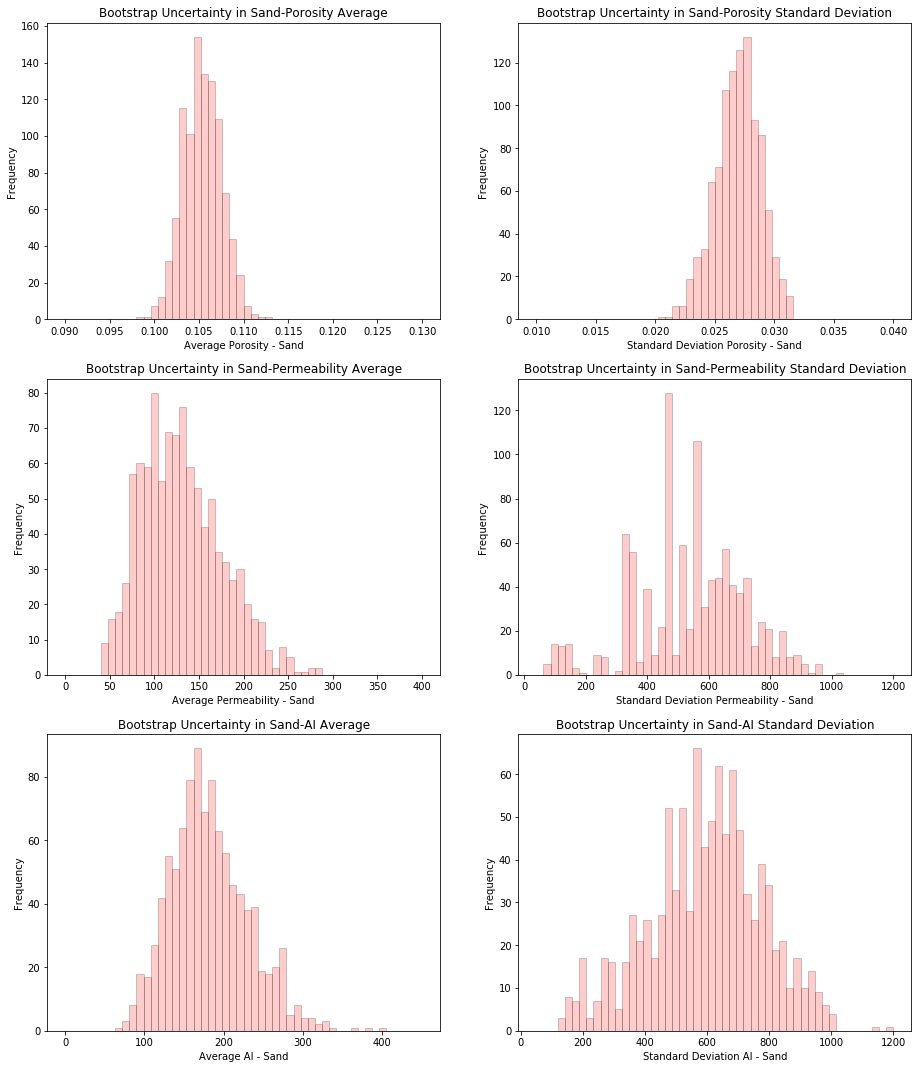

Summary Statistics for Bootstrap Porosity Mean Realizations:
DescribeResult(nobs=1000, minmax=(0.09879833203542443, 0.11240637590881254), mean=0.10537077254581939, variance=4.4822758687437885e-06, skewness=0.04413045808134498, kurtosis=-0.1577179633767578)
P10 0.103, P50 0.105, P90 0.108

Summary Statistics for Bootstrap Porosity Standard Deviation Realizations:
DescribeResult(nobs=1000, minmax=(0.020520963696417184, 0.031592543629347436), mean=0.026934387865636997, variance=3.5916699221368354e-06, skewness=-0.19906520914515338, kurtosis=-0.09926744559451439)
P10 0.024, P50 0.027, P90 0.029


Summary Statistics for Bootstrap Permeability Mean Realizations:
DescribeResult(nobs=1000, minmax=(42.23201579723454, 286.23973852992975), mean=130.60595104131625, variance=2041.7129055062192, skewness=0.5357673310475333, kurtosis=-0.045609247780886264)
P10 76.077, P50 126.146, P90 193.426

Summary Statistics for Bootstrap Permeability Standard Deviation Realizations:
DescribeResult(nobs=1000, min

In [216]:
L = 1000                                 # set the number of realizations
mean_po = np.zeros(L); stdev_po = np.zeros(L)    # declare arrays to hold the realizations of the statistics
mean_pe = np.zeros(L); stdev_pe = np.zeros(L)
mean_ai = np.zeros(L); stdev_ai = np.zeros(L)
for l in range(0, L):                      # loop over realizations
    samples_po = random.choices(df_sand['Porosity'].values, weights=df_sand['Wts_po'].values, cum_weights=None, k=len(df_sand))
    mean_po[l] = np.average(samples_po)
    stdev_po[l] = np.std(samples_po)
    samples_pe = random.choices(df_sand['Perm'].values, weights=df_sand['Wts_pe'].values, cum_weights=None, k=len(df_sand))
    mean_pe[l] = np.average(samples_pe)
    stdev_pe[l] = np.std(samples_pe)
    samples_ai = random.choices(df_sand['Perm'].values, weights=df_sand['Wts_ai'].values, cum_weights=None, k=len(df_sand))
    mean_ai[l] = np.average(samples_ai)
    stdev_ai[l] = np.std(samples_ai)
    
plt.subplot(321)
GSLIB.hist_st(mean_po,0.09,0.13,False,False,50,None,'Average Porosity - Sand','Bootstrap Uncertainty in Sand-Porosity Average')

plt.subplot(322)
GSLIB.hist_st(stdev_po,0.01,0.04,False,False,50,None,'Standard Deviation Porosity - Sand','Bootstrap Uncertainty in Sand-Porosity Standard Deviation')

plt.subplot(323)
GSLIB.hist_st(mean_pe,0,400,False,False,50,None,'Average Permeability - Sand','Bootstrap Uncertainty in Sand-Permeability Average')

plt.subplot(324)
GSLIB.hist_st(stdev_pe,40,1200,False,False,50,None,'Standard Deviation Permeability - Sand','Bootstrap Uncertainty in Sand-Permeability Standard Deviation')

plt.subplot(325)
GSLIB.hist_st(mean_ai,0,450,False,False,50,None,'Average AI - Sand','Bootstrap Uncertainty in Sand-AI Average')

plt.subplot(326)
GSLIB.hist_st(stdev_ai,50,1200,False,False,50,None,'Standard Deviation AI - Sand','Bootstrap Uncertainty in Sand-AI Standard Deviation')


plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=3.5, wspace=0.2, hspace=0.2)
plt.show()   
    
print('Summary Statistics for Bootstrap Porosity Mean Realizations:')
print(stats.describe(mean_po))
print('P10 ' + str(round(np.percentile(mean_po,10),3)) + ', P50 ' + str(round(np.percentile(mean_po,50),3)) + ', P90 ' + str(round(np.percentile(mean_po,90),3))) 

print('\nSummary Statistics for Bootstrap Porosity Standard Deviation Realizations:')
print(stats.describe(stdev_po))
print('P10 ' + str(round(np.percentile(stdev_po,10),3)) + ', P50 ' + str(round(np.percentile(stdev_po,50),3)) + ', P90 ' + str(round(np.percentile(stdev_po,90),3)))

print('\n\nSummary Statistics for Bootstrap Permeability Mean Realizations:')
print(stats.describe(mean_pe))
print('P10 ' + str(round(np.percentile(mean_pe,10),3)) + ', P50 ' + str(round(np.percentile(mean_pe,50),3)) + ', P90 ' + str(round(np.percentile(mean_pe,90),3))) 

print('\nSummary Statistics for Bootstrap Permeability Standard Deviation Realizations:')
print(stats.describe(stdev_pe))
print('P10 ' + str(round(np.percentile(stdev_pe,10),3)) + ', P50 ' + str(round(np.percentile(stdev_pe,50),3)) + ', P90 ' + str(round(np.percentile(stdev_pe,90),3)))

print('\n\nSummary Statistics for Bootstrap AI Mean Realizations:')
print(stats.describe(mean_ai))
print('P10 ' + str(round(np.percentile(mean_ai,10),3)) + ', P50 ' + str(round(np.percentile(mean_ai,50),3)) + ', P90 ' + str(round(np.percentile(mean_ai,90),3))) 

print('\nSummary Statistics for Bootstrap AI Standard Deviation Realizations:')
print(stats.describe(stdev_ai))
print('P10 ' + str(round(np.percentile(stdev_ai,10),3)) + ', P50 ' + str(round(np.percentile(stdev_ai,50),3)) + ', P90 ' + str(round(np.percentile(stdev_ai,90),3)))

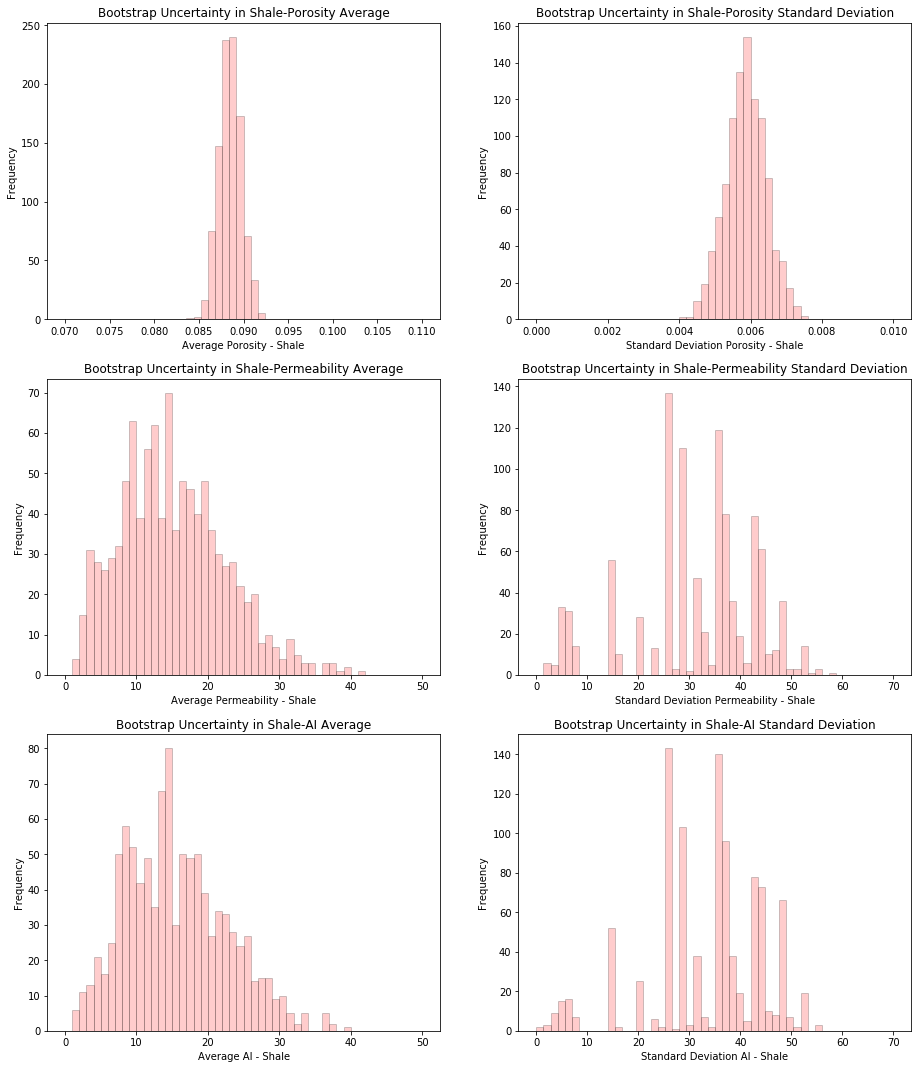

Summary Statistics for Bootstrap Porosity Mean Realizations:
DescribeResult(nobs=1000, minmax=(0.08422546206554492, 0.09216369252588273), mean=0.08847158211184332, variance=1.5380487121324504e-06, skewness=0.0220825367903384, kurtosis=-0.1699138875752766)
P10 0.087, P50 0.088, P90 0.09

Summary Statistics for Bootstrap Porosity Standard Deviation Realizations:
DescribeResult(nobs=1000, minmax=(0.004163756471416704, 0.007448766201762094), mean=0.005876039337201953, variance=3.209671302949887e-07, skewness=-0.026882542727394394, kurtosis=-0.09731244640910885)
P10 0.005, P50 0.006, P90 0.007


Summary Statistics for Bootstrap Permeability Mean Realizations:
DescribeResult(nobs=1000, minmax=(1.4052586939023843, 41.09933140704043), mean=15.090359006537394, variance=53.60326879417776, skewness=0.5370160921232148, kurtosis=0.10019432678323748)
P10 5.902, P50 14.441, P90 24.572

Summary Statistics for Bootstrap Permeability Standard Deviation Realizations:
DescribeResult(nobs=1000, minmax=(1.4

In [218]:
L = 1000                                 # set the number of realizations
mean_po = np.zeros(L); stdev_po = np.zeros(L)    # declare arrays to hold the realizations of the statistics
mean_pe = np.zeros(L); stdev_pe = np.zeros(L)
mean_ai = np.zeros(L); stdev_ai = np.zeros(L)
for l in range(0, L):                      # loop over realizations
    samples_po = random.choices(df_shale['Porosity'].values, weights=df_shale['Wts_po'].values, cum_weights=None, k=len(df_shale))
    mean_po[l] = np.average(samples_po)
    stdev_po[l] = np.std(samples_po)
    samples_pe = random.choices(df_shale['Perm'].values, weights=df_shale['Wts_pe'].values, cum_weights=None, k=len(df_shale))
    mean_pe[l] = np.average(samples_pe)
    stdev_pe[l] = np.std(samples_pe)
    samples_ai = random.choices(df_shale['Perm'].values, weights=df_shale['Wts_ai'].values, cum_weights=None, k=len(df_shale))
    mean_ai[l] = np.average(samples_ai)
    stdev_ai[l] = np.std(samples_ai)
    
plt.subplot(321)
GSLIB.hist_st(mean_po,0.07,0.11,False,False,50,None,'Average Porosity - Shale','Bootstrap Uncertainty in Shale-Porosity Average')

plt.subplot(322)
GSLIB.hist_st(stdev_po,0.,0.01,False,False,50,None,'Standard Deviation Porosity - Shale','Bootstrap Uncertainty in Shale-Porosity Standard Deviation')

plt.subplot(323)
GSLIB.hist_st(mean_pe,0,50,False,False,50,None,'Average Permeability - Shale','Bootstrap Uncertainty in Shale-Permeability Average')

plt.subplot(324)
GSLIB.hist_st(stdev_pe,0,70,False,False,50,None,'Standard Deviation Permeability - Shale','Bootstrap Uncertainty in Shale-Permeability Standard Deviation')

plt.subplot(325)
GSLIB.hist_st(mean_ai,0,50,False,False,50,None,'Average AI - Shale','Bootstrap Uncertainty in Shale-AI Average')

plt.subplot(326)
GSLIB.hist_st(stdev_ai,0,70,False,False,50,None,'Standard Deviation AI - Shale','Bootstrap Uncertainty in Shale-AI Standard Deviation')


plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=3.5, wspace=0.2, hspace=0.2)
plt.show()   
    
print('Summary Statistics for Bootstrap Porosity Mean Realizations:')
print(stats.describe(mean_po))
print('P10 ' + str(round(np.percentile(mean_po,10),3)) + ', P50 ' + str(round(np.percentile(mean_po,50),3)) + ', P90 ' + str(round(np.percentile(mean_po,90),3))) 

print('\nSummary Statistics for Bootstrap Porosity Standard Deviation Realizations:')
print(stats.describe(stdev_po))
print('P10 ' + str(round(np.percentile(stdev_po,10),3)) + ', P50 ' + str(round(np.percentile(stdev_po,50),3)) + ', P90 ' + str(round(np.percentile(stdev_po,90),3)))

print('\n\nSummary Statistics for Bootstrap Permeability Mean Realizations:')
print(stats.describe(mean_pe))
print('P10 ' + str(round(np.percentile(mean_pe,10),3)) + ', P50 ' + str(round(np.percentile(mean_pe,50),3)) + ', P90 ' + str(round(np.percentile(mean_pe,90),3))) 

print('\nSummary Statistics for Bootstrap Permeability Standard Deviation Realizations:')
print(stats.describe(stdev_pe))
print('P10 ' + str(round(np.percentile(stdev_pe,10),3)) + ', P50 ' + str(round(np.percentile(stdev_pe,50),3)) + ', P90 ' + str(round(np.percentile(stdev_pe,90),3)))

print('\n\nSummary Statistics for Bootstrap AI Mean Realizations:')
print(stats.describe(mean_ai))
print('P10 ' + str(round(np.percentile(mean_ai,10),3)) + ', P50 ' + str(round(np.percentile(mean_ai,50),3)) + ', P90 ' + str(round(np.percentile(mean_ai,90),3))) 

print('\nSummary Statistics for Bootstrap AI Standard Deviation Realizations:')
print(stats.describe(stdev_ai))
print('P10 ' + str(round(np.percentile(stdev_ai,10),3)) + ', P50 ' + str(round(np.percentile(stdev_ai,50),3)) + ', P90 ' + str(round(np.percentile(stdev_ai,90),3)))